In [33]:
#30
'''import MeCab
fname='neko.txt'
fname_parsed='neko.txt.mecab'

def parse_neko():
    #neko.txtを形態素解析して、neko.txt.mecabに保存する
    
    with open(fname) as data_file,open(fname_parsed,mode='w') as out_file:
        mecab=MeCab.Tagger('-Ochasen')
        out_file.write(mecab.parse(data_file.read()))'''
        
def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],   #表層形
                'base':res_cols[6],   #基本形
                'pos':res_cols[0],   #品詞
                'pos1':res_cols[1]   #品詞細分類1
            }
            morphemes.append(morpheme)



# parse_neko()

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)

In [34]:
print(len(sentenceList))

9964


In [55]:
print(sentenceList[2])

[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '', 'base': '*', 'pos': '記号', 'pos1': '一般'}]


In [101]:
#31
def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)

verbs=set()
verbs_num=[]   #出現順にソートする用の辞書
for line in sentenceList:
    '''i+=1
    print(line)
    if i==5:
        break'''
    for morpheme in line:
        if morpheme['pos']=='動詞':
            verbs.add(morpheme['surface'])
            verbs_num.append(morpheme['surface'])
verbs_s=sorted(verbs,key=verbs_num.index)   #出現順にソート

print(verbs_s)
'''for verb in verbs:
    if verb=='生れ':
        print('exist!')'''

['生れ', 'つか', 'し', '泣い', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'あっ', '落ちつい', '思っ', '残っ', 'さ', 'れ', '逢っ', '出会わ', 'のみ', 'なら', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', '動く', '分ら', '廻る', 'なる', '助から', 'さり', '出', '考え出そ', '付い', '見る', 'い', '見え', '隠し', 'しまっ', '違っ', '明い', '這い出し', '棄て', '這い出す', 'ある', '考え', '来', 'くれる', '考え付い', 'やっ', '渡っ', 'かかる', '減っ', '泣き', 'そろ', '廻り', '這っ', '行く', '這入っ', '崩れ', 'もぐり込ん', '破れ', '知れ', '云っ', '至る', 'なっ', '忍び込ん', '減る', '降っ', '来る', '出来', 'あるい', '考える', 'つかん', '抛り出し', 'ねぶっ', '任せ', '這い', '上っ', '投げ出さ', '上り', '繰り返し', '云う', '下り', 'つまみ出さ', 'れよ', 'いい', 'ぶら下げ', '向け', '出し', '困り', 'いう', '撚り', '眺め', '置い', 'やれ', '聞か', '極める', '合せる', '帰る', '見せ', '覗い', '読みかけ', 'たらし', '帯び', 'あらわし', '食っ', '飲ん', 'ひろげる', '読む', '垂らす', '繰り返す', '限る', '寝', '勤まる', '云わ', 'せる', '鳴らし', '住み込ん', '行っ', '跳ね', '付け', 'くれ', 'つけ', '分る', '得る', '入れ', 'つとめ', '乗る', '構い', 'やむを得ん', '寝る', '入っ', 'ねる', '見出し', '割り込む', '醒ます', 'いっ', '出す', 'さまし', '飛び出し', 'くる', '叩か', 'すれ', '得', '至っ', 'かぶせ', '押し込ん', 'しよ', 

"for verb in verbs:\n    if verb=='生れ':\n        print('exist!')"

In [70]:
#32
def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)

verbs=set()
verbs_num=[]   #出現順にソートする用の辞書
for line in sentenceList:
    for morpheme in line:
        if morpheme['pos']=='動詞':
            verbs.add(morpheme['base'])
            verbs_num.append(morpheme['base'])
            
verbs_s=sorted(verbs,key=verbs_num.index)   #出現順にソート

print(verbs_s)

['生れる', 'つく', 'する', '泣く', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'ある', '落ちつく', '残る', 'れる', '逢う', '出会う', 'のむ', 'なる', '吹く', '弱る', '飲む', '知る', '坐る', 'おる', '動く', '分る', '廻る', '助かる', 'さる', '出る', '考え出す', '付く', '見える', '隠す', 'しまう', '違う', '明く', '這い出す', '棄てる', '考える', '来る', 'くれる', '考え付く', 'やる', '渡る', 'かかる', '減る', 'そる', '這う', '行く', '這入る', '崩れる', 'もぐり込む', '破れる', '知れる', '云う', '至る', '忍び込む', '降る', '出来る', 'あるく', 'つかむ', '抛り出す', 'ねぶる', '任せる', '上る', '投げ出す', '繰り返す', '下りる', 'つまみ出す', 'いう', 'ぶら下げる', '向ける', '出す', '困る', '撚る', '眺める', '置く', '極める', '合せる', '帰る', '見せる', '覗く', '読みかける', 'たらす', '帯びる', 'あらわす', 'ひろげる', '読む', '垂らす', '限る', '寝る', '勤まる', 'せる', '鳴らす', '住み込む', '跳ねる', '付ける', 'つける', '得る', '入れる', 'つとめる', '乗る', '構う', 'やむを得る', '入る', 'ねる', '見出す', '割り込む', '醒ます', 'さます', '飛び出す', 'くる', '叩く', 'かぶせる', '押し込む', '追い廻す', '加える', '磨く', '怒る', 'える', '言う', '産まれる', '持つ', '来たす', '流す', '話す', '戦う', '隣る', '解す', '見付ける', '守る', '訴える', '頼む', '奪う', 'すます', 'おりる', '住む', '送る', '栄える', '待つ', '思い出す', '勝れる', 'がる', 

In [75]:
#33
def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
noun_p_no=set()
noun_p_no_num=[]   #出現順にソートする用の辞書
for line in sentenceList:
    for num in range(len(line)):
        if line[num-1]['pos']=='名詞' and line[num]['pos']=='助詞' and line[num]['pos1']=='連体化' and line[num+1]['pos']=='名詞':
            noun_p_no.add(line[num-1]['surface']+line[num]['surface']+line[num+1]['surface'])
            noun_p_no_num.append(line[num-1]['surface']+line[num]['surface']+line[num+1]['surface'])
            
noun_p_no_s=sorted(noun_p_no,key=noun_p_no_num.index)   #出現順にソート

print(noun_p_no_s)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上', '毛の間', '中の大王', '吾輩の倍', '嘆賞の念', '好奇の心',

In [76]:
#34
def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
nouns=set()
nouns_num=[]   #出現順にソートする用の辞書
noun=''
num=0
for line in sentenceList:
    for morpheme in line:
        if morpheme['pos']=='名詞':
            noun=''.join([noun,morpheme['surface']])
            num+=1
        elif num>=2:
            nouns.add(noun)
            nouns_num.append(noun)
            noun=''
            num=0
        else:
            noun=''
            num=0
    if num>=2:   #文の最後の名詞の連接をカバー
        nouns.add(noun)
        nouns.append(noun)
            
nouns_s=sorted(nouns,key=nouns_num.index)   #出現順にソート

print(nouns_s)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '先日玉', '四疋', '三日目', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '間違いだらけ', '後架先生', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎呼わり', '平生吾輩', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '何匹', '近付', '事彼', '手柄話', '欠所', '三四十', '二百', '何鼠', 'こん畜生', '泥溝', '奴め最後っ屁', '二三遍', '百年目', '考げ', '——一', '五銭', '壱円五十銭', '胡魔化', '

In [79]:
#35
from collections import Counter

def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
word_counter=Counter()
for line in sentenceList:
    for morpheme in line:
        word_counter.update(morpheme['surface'])   #update()で1行ずつ追加
list_word=word_counter.most_common()   #most_common(n)で出現頻度順に並んだリストを取り出す。引数nは取り出す上位個数

print(list_word)

[('の', 12476), ('い', 10299), ('る', 8724), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947), ('は', 6878), ('、', 6773), ('で', 6226), ('た', 6131), ('を', 6119), ('が', 6000), ('っ', 5629), ('ら', 5552), ('う', 5326), ('も', 5220), ('ん', 4015), ('だ', 3905), ('あ', 3901), ('す', 3680), ('く', 3328), ('れ', 3279), ('ま', 3273), ('「', 3238), ('」', 3238), ('り', 3060), ('こ', 2684), ('そ', 2464), ('人', 2287), ('よ', 2152), ('え', 1829), ('さ', 1733), ('事', 1491), ('云', 1423), ('ど', 1404), ('け', 1392), ('君', 1315), ('ろ', 1308), ('や', 1300), ('き', 1294), ('出', 1233), ('見', 1216), ('つ', 1174), ('ち', 1121), ('へ', 1097), ('一', 1071), ('ば', 1038), ('主', 1024), ('せ', 1011), ('来', 978), ('ゃ', 970), ('わ', 941), ('ね', 918), ('御', 851), ('じ', 844), ('大', 818), ('何', 794), ('め', 780), ('分', 760), ('お', 752), ('上', 749), ('ず', 748), ('気', 708), ('間', 693), ('生', 680), ('—', 666), ('思', 658), ('時', 600), ('方', 565), ('吾', 535), ('ご', 521), ('行', 518), ('ょ', 514), ('中', 508), ('子', 50

[('の', 12476), ('い', 10299), ('る', 8724), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947)]


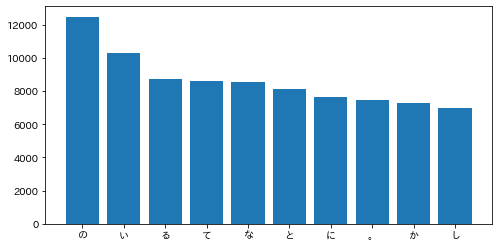

In [88]:
#36
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
word_counter=Counter()
for line in sentenceList:
    for morpheme in line:
        word_counter.update(morpheme['surface'])
list_word=word_counter.most_common(10)

print(list_word)

keys=[i[0] for i in list_word]
values=[i[1] for i in list_word]
plt.figure(figsize=(8,4))
plt.bar(keys,values)   #棒グラフ
plt.show()

[('る', 817), ('の', 523), ('い', 374), ('と', 308), ('て', 303), ('は', 293), ('に', 293), ('だ', 278), ('す', 272), ('な', 249)]


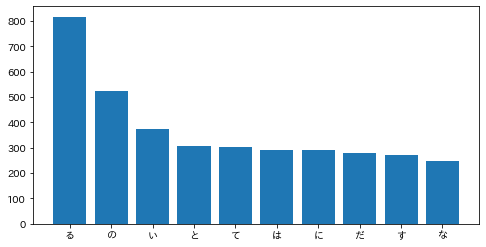

In [92]:
#37
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
word_counter=Counter()
for line in sentenceList:
    if '猫' in [morpheme['surface'] for morpheme in line]:  #文章の形態素に「猫」が含まれている場合のみ辞書に追加する
        for morpheme in line:  
            if morpheme['pos']!='記号' and morpheme['surface']!='猫':
                word_counter.update(morpheme['base'])
            
list_word=word_counter.most_common(10)

print(list_word)

keys=[i[0] for i in list_word]
values=[i[1] for i in list_word]
plt.figure(figsize=(8,4))
plt.bar(keys,values)   #棒グラフ
plt.show()

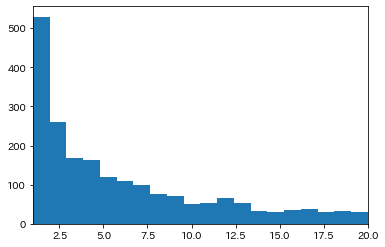

In [100]:
#38
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

def neko_lines():
    with open(fname_parsed) as file_parsed:
        morphemes=[]
        for line in file_parsed:
            if line=='\n':
                continue
            line = line.strip('\n')
            #表層形はtab、それ以外は,で区切る
            cols=line.split('\t')
            if cols[0] == 'EOS':
                yield morphemes
                #yield:この時点で関数を一時的に停止して戻り値を返す
                morphemes = []
                continue
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)

lines = neko_lines()
sentenceList=[]
for line in lines:
    sentenceList.append(line)
    
word_counter=Counter()
for line in sentenceList:
    for morpheme in line:
        word_counter.update(morpheme['surface'])
list_word=word_counter.most_common()

counts=list(zip(*list_word))[1]   #zip:複数のイテラブルオブジェクトの要素をまとめる
#*をつけるとリストの中身

plt.hist(counts,bins=20,range=(1,20))  #縦軸：単語の種類数、横軸：出現頻度
plt.xlim(xmin=1,xmax=20)
plt.show()